# Transformaciones del conjunto de datos

Son algoritmos que crean una nueva representación de los datos que podría ser más fácil de entender en comparación con la representación original de los datos. Algunas de las aplicaciones de estas tranformaciones son: 

* Reducción de la dimensionalidad: toma una representación de alta dimensión de los datos, que consta de muchas características, y encuentra una nueva forma de representar estos datos que resume las características esenciales con menos características.
* Encontrar las partes que componen los datos.


# Reducción de dimensionalidad

Las motivaciones más comunes  para la transformación de datos mediante el aprendizaje no supervisado son la visualización, la compresión de los datos y la búsqueda de una representación que sea más informativa para su posterior procesamiento.

En un algoritmo, es posible que cuanta más (y mejor) información se tenga, se pueda obtener una predicción más acertada. Pero también empezaremos a notar que la ejecución de nuestro algoritmo seleccionado empezará a tomar más y más tiempo y recursos. Es posible que algunas de las variables sean menos importantes y no aporten demasiado valor a la predicción. 

<center>
¿No sería mejor tomar menos variables, pero más valiosas?
</center>

Al quitar variables estaríamos haciendo Reducción de Dimensiones.   Para reducir las dimensiones podemos hacer dos cosas:
* Eliminar por completo dimensiones.
* Extracción de Características.

Se intentará mantener todas las variables posibles, pero prescindiremos de las menos importantes. Como en la extracción de características, se tienen las variables ordenadas de “mejor a peor predictora'' ya sabemos cuales serán las más y menos valiosas.

A diferencia de la eliminación directa de una característica “vieja'', nuestras nuevas variables son combinaciones de todas las variables originales, aunque eliminemos algunas, estaremos manteniendo la información útil de todas las variables iniciales.

Uno de los algoritmos más simples y más utilizados para todo esto es el Análisis de Componentes Principales (PCA). 

# Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica estadística usada para reducir la dimensionalidad de un conjunto de datos, conservando la mayor cantidad de información posible. Se basa en encontrar nuevas variables (componentes principales) que sean combinaciones lineales de las variables originales y que estén incorrelacionadas entre sí (ortogonales).

**¿Por qué reducir dimensiones?**
* Simplifica modelos complejos.
* Facilita visualización de datos multivariados.
* Reduce ruido y mejora desempeño en modelos de Machine Learning.


**Proceso del PCA**

En resumen lo que hace el algoritmo es:
  * Estandarizar los datos de entrada. 
  * Obtener los valores y vectores propios de la matriz de covarianzas. 
  * Ordenar los valores propios de mayor a menor y elegir los vectores propios que se correspondan con los valores propios más grandes.
  * Construir la matriz de proyección con los vectores propios seleccionados.
  * Transformar el dataset original vía la matriz de proyección para obtener las nuevas características. 

**Resultados del PCA**

Con PCA se puede obtener:

  * una medida de como cada variable se asocia con las otras (matriz de covarianza)
  * La dirección en las que nuestros datos están dispersos (vectores propios)
  * La relativa importancia de esas distintas direcciones (valores propios)

# Ejemplos:

Empezaremos con algunos ejemplos clásicos que nos ayudarán a comprender el funcionamiento de componentes principales. 

# Ejemplo 1: Iris (Visualización)

Consideramos un conjunto de datos (Iris) que contiene 3 tipos de flores de Iris (Setosa, Versicolor, Virginica) con 4 características (longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo).  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#PCA
from sklearn import datasets
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# k-medias
from sklearn.cluster import KMeans

# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
iris=datasets.load_iris()

In [3]:
#Extraemos la información (entradas y salida)
X=iris.data #4 características
y=iris.target #tipo de iris (originales)
etiqueta=iris.target_names

Se pueden extraer tantos componentes principales como variables (características) originales se tengan 

In [ ]:
#Usamos componentes principales
pca=PCA(n_components=2)       # Nombre del modelo (número de componentes principales)
X_c=pca.fit_transform(X)      # Entrenar y ajustar la base de datos

In [ ]:
#Obtenemos los 4 (2) componentes principales  (vectores propios)
pca.components_
# Se obtienen los pesos de cada variable dentro de cada componente principal

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [8]:
iris.feature_names #nombre de las variables

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
# Imprimir las combinaciones lineales de las características originales que forman los componentes principales
print("Las componentes principales son:\n")
for i, component in enumerate(pca.components_):
	print(f"Z{i+1} =")
	for feature, weight in zip(iris.feature_names, component):
		print(f"({weight:.4f}) * {feature})", end=" + ")
	print()

Las componentes principales son:

Z1 =
(0.3614) * sepal length (cm)) + (-0.0845) * sepal width (cm)) + (0.8567) * petal length (cm)) + (0.3583) * petal width (cm)) + 
Z2 =
(0.6566) * sepal length (cm)) + (0.7302) * sepal width (cm)) + (-0.1734) * petal length (cm)) + (-0.0755) * petal width (cm)) + 
Z3 =
(-0.5820) * sepal length (cm)) + (0.5979) * sepal width (cm)) + (0.0762) * petal length (cm)) + (0.5458) * petal width (cm)) + 
Z4 =
(0.3155) * sepal length (cm)) + (-0.3197) * sepal width (cm)) + (-0.4798) * petal length (cm)) + (0.7537) * petal width (cm)) + 


## Proporción de la varianza explicada por cada componente.

¿Cuánta información presente en el conjunto de datos originales se pierde al proyectar las observaciones en un espacio de menor dimensión?

¿Cuánta información es capaz de capturar cada una de las componentes principales obtenidas?

In [14]:
#Varianza explicada
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

El primer componente explica el 92.4% de la variabilidad total.

El segundo componente explica el 5.3% de la variabilidad total. 

Con estas dos componentes ya obtenemos un 97.7% de la variabilidad total. Por lo que, consideraremos sólo estas dos componentes. 

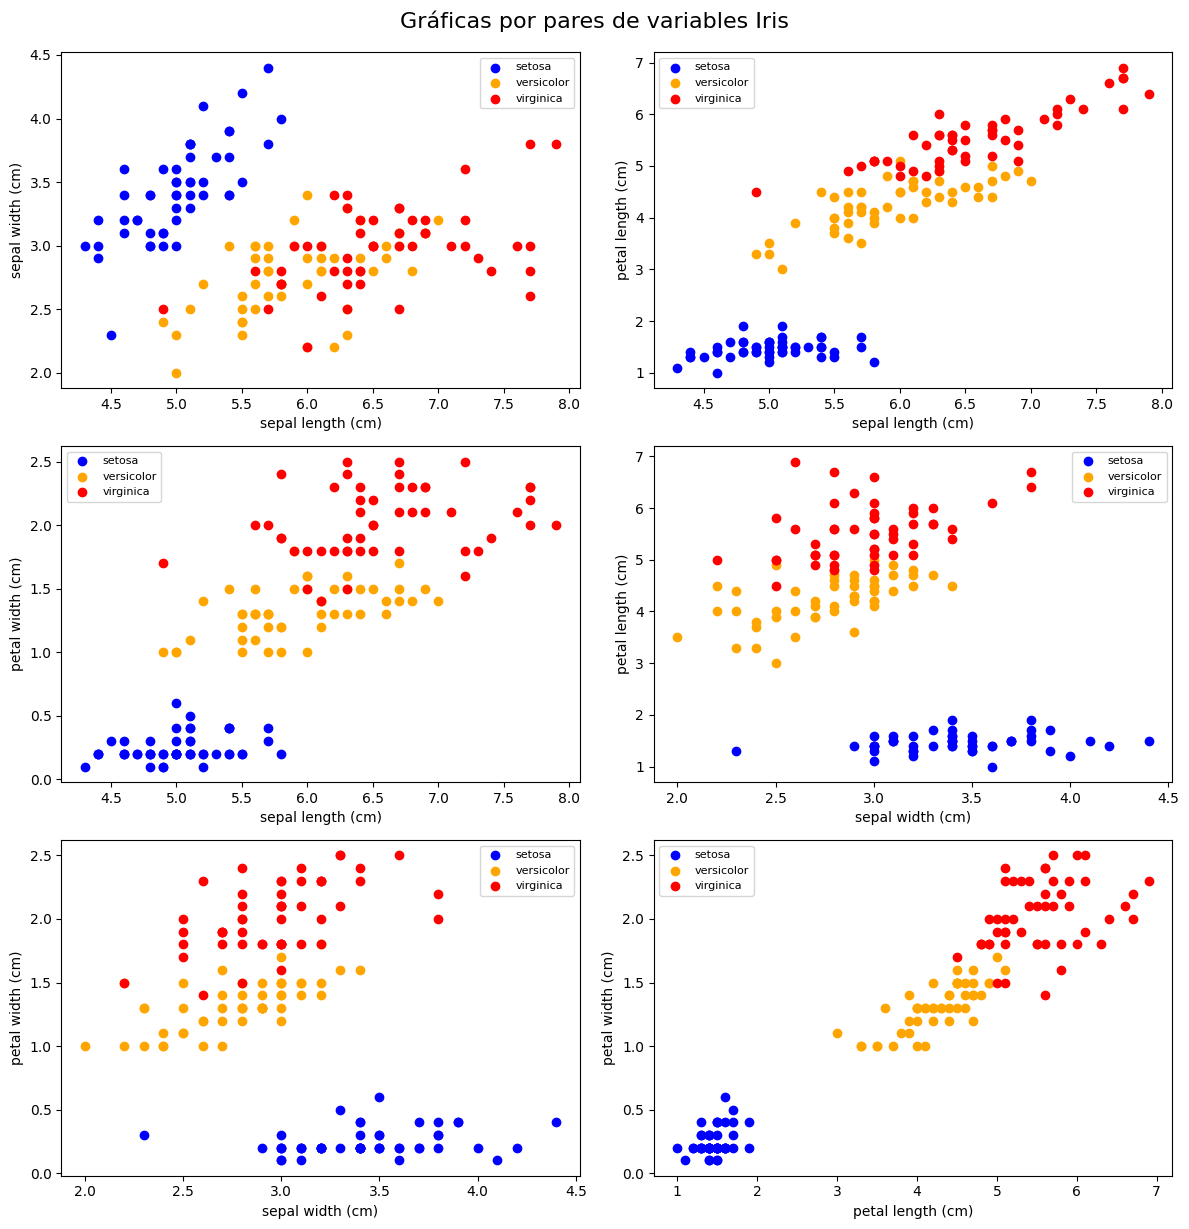

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
etiqueta = iris.target_names
n_features = X.shape[1]
colores = ["blue", "orange", "red"]
nombres_vars = iris.feature_names

# Crear gráficas de todas las combinaciones de pares de variables
plt.figure(figsize=(12, 12))
plot_num = 1

for i in range(n_features):
    for j in range(i + 1, n_features):
        plt.subplot(3, 2, plot_num)
        for color, clase, eti in zip(colores, [0, 1, 2], etiqueta):
            plt.scatter(X[y == clase, i], X[y == clase, j], c=color, label=eti)
        plt.xlabel(nombres_vars[i])
        plt.ylabel(nombres_vars[j])
        plt.legend(loc='best', fontsize=8)
        plot_num += 1

plt.tight_layout()
plt.suptitle("Gráficas por pares de variables Iris", fontsize=16, y=1.02)
plt.show()


Text(0, 0.5, 'Segundo componente')

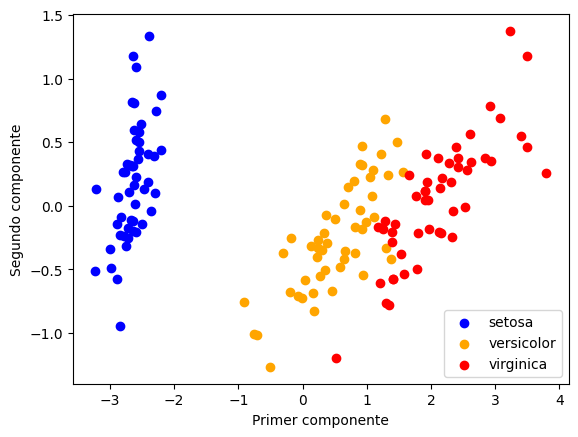

In [16]:
#Visualización de los primeros dos componentes principales
colores=["blue","orange","red"]
for color,i,eti in zip(colores,[0,1,2],etiqueta):
    plt.scatter(
    X_c[y==i,0],X_c[y==i,1],c=color, label=eti
    )
plt.legend(loc='best')
plt.xlabel("Primer componente")
plt.ylabel("Segundo componente")

Con solo una variable (primer componente principales) podemos conjeturar que 
si Z1<-1.5 será setosa
si -1.5<Z1<1.2 será versicolor
si Z1>1.2 será virginica.

Realicemos esta agrupación en nuestros datos.

In [17]:
#Agrupación
condiciones=[X_c[:,0]<-1.5,X_c[:,0]<1.2] #[:0] usamos la primer componente
valores=["setosa","versicolor"]
clase=np.select(condiciones,valores, default="virginica")

In [18]:
#Obtenemos los valores de cada iris.
y_real=np.array([etiqueta[i] for i in y])

Vamos a comparar estos resultados con los originales

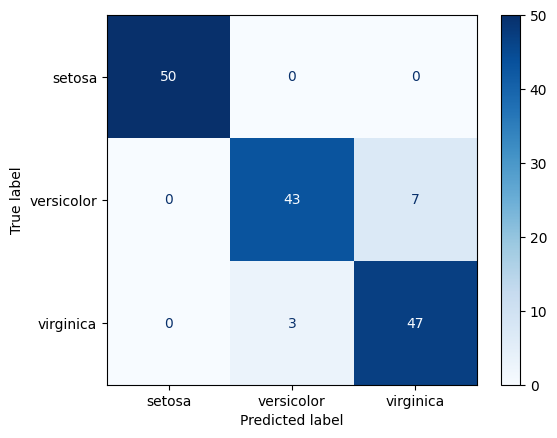

In [19]:
# Matriz de confusión
cm=confusion_matrix(y_real,clase, labels=etiqueta)
disp=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=etiqueta)
disp.plot(cmap='Blues')

In [20]:
#Precisión
precision=np.mean(clase==y_real)
print(f"Precisión de nuestra agrupación: {precision*100:.2f}%")

Precisión de nuestra agrupación: 93.33%


# k-medias usando componentes principales

In [23]:
# Ahora realizamos k-medias con k=3 usando componentes principales
kmedias=KMeans(n_clusters=3)       # Algoritmo y solo necesita el número de grupos
kmedias.fit(X_c)       			   # Entrenamos el modelo con las componentes principales

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [25]:
# Guardamos las etiquetas que generó el algoritmo
etiquetas = kmedias.fit_predict(X_c)
# etiquetas = predicho por el modelo
# y = etiquetas reales

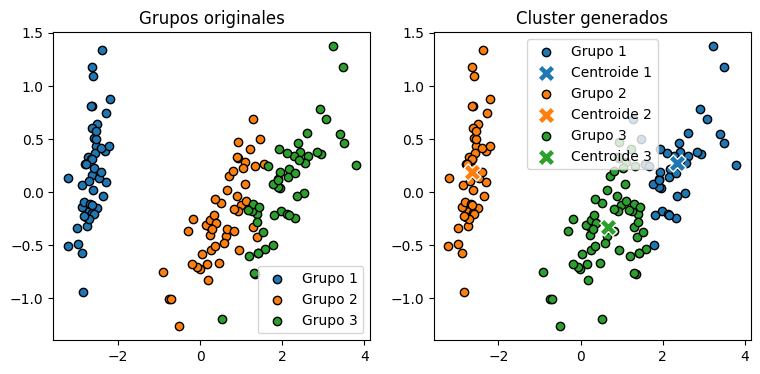

In [33]:
#Vamos a graficar los resultados de k-medias con sus centroides y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,2,figsize=(9,4))      # Un renglón de dos columnas

#Grupos originales
for i in np.unique(y):
    ax[0].scatter(
    x=X_c[y==i,0],
    y=X_c[y==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[0].set_title('Grupos originales')      # Grafico 0 (ax[0])
ax[0].legend();

#Clusters generados con la leyenda fuera de la gráfica
for i in np.unique(etiquetas):
    ax[1].scatter(
    x=X_c[etiquetas==i,0],
    y=X_c[etiquetas==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
    ax[1].scatter(
    x=kmedias.cluster_centers_[i, 0],
    y=kmedias.cluster_centers_[i, 1],
    c=[plt.rcParams['axes.prop_cycle'].by_key()['color'][i]],
    marker='X',
    s=150,
    edgecolor='white',
    label=f"Centroide {i+1}")
ax[1].set_title('Cluster generados')    # Grafico 1 (ax[1])
ax[1].legend();

In [31]:
# Tabla cruzada de los resultados de k-medias
pd.crosstab(y_real, etiquetas, rownames=['Real'], colnames=['K-medias'])

K-medias,0,1,2
Real,,,
setosa,0,50,0
versicolor,3,0,47
virginica,36,0,14


# Ejemplo 2: Alumnos

Esta base de datos nos muestra las calificaciones de 8 asignaturas en alumnos de secundaria

In [36]:
datos=pd.read_csv("C:\\Users\\GabDomDal\\Desktop\\Ejercicios\\Analitica de datos\\Trabajo 22\\alumnos1.csv")

In [37]:
datos.head()

,Alumno,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
0,A,5,5,5,5,5,5,5,5
1,B,7,4,3,8,4,7,3,8
2,C,5,8,7,6,5,6,7,5
3,D,7,2,4,8,7,7,3,6
4,E,8,9,10,8,8,7,9,4


In [38]:
#quitamos el atributo alumnos
datos1=datos.drop(['Alumno'],axis=1)
datos1.head()

,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
0,5,5,5,5,5,5,5,5
1,7,4,3,8,4,7,3,8
2,5,8,7,6,5,6,7,5
3,7,2,4,8,7,7,3,6
4,8,9,10,8,8,7,9,4


In [39]:
#Empezamos con nuestro PCA
pca=PCA(n_components=8)
X_c=pca.fit_transform(datos1)

¿Cómo podríamos saber cuál es número óptimo de componentes principales?
Una manera gráfica es mediante el porcentaje acumulado de la varianza explicada, y posteriormente analizarlo mediante el método del codo.

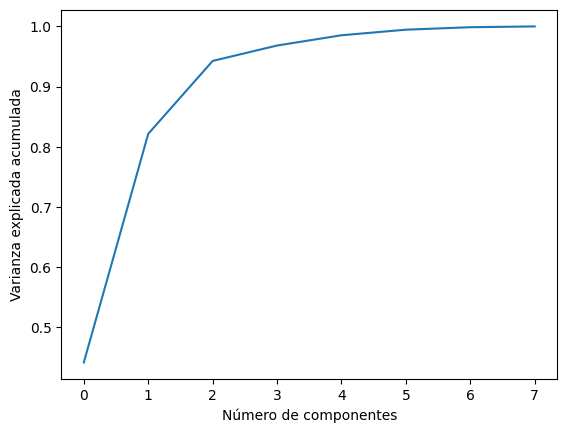

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

# Observación: El número de componentes se recorre en uno a uno desde 1 hasta el número máximo de componentes (8 en este caso).

Con este gráfico podemos observar que el número de óptimo de componentes está entre 2 y 3

In [41]:
#Consideremos un nuevo PCA
pca=PCA(n_components=3)
X_c=pca.fit_transform(datos1)

In [42]:
pca.explained_variance_ratio_

array([0.44158748, 0.37988895, 0.1211854 ])

In [43]:
#valores propios
pca.singular_values_

array([13.87347332, 12.86782539,  7.26778336])

En este ejemplo analizaremos las variables en cada componentes respecto al valor de su coeficiente. 

In [44]:
#Mostraremos los coeficientes de cada componente respecto a las variables originales
pd.DataFrame(
data=pca.components_,
    columns=datos1.columns,
    index=['CP1','CP2','CP3']
)

,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
CP1,-0.105372,0.562462,0.533640,-0.168784,-0.088214,-0.145627,0.559317,-0.132095
CP2,0.407114,0.119003,0.189125,0.490005,0.487020,0.497153,0.171843,0.174193
CP3,-0.033150,0.132830,0.065151,-0.019679,-0.305344,-0.025606,-0.041066,0.938642


Con esta tabla podemos obtener lo siguiente:

El primer componente engloba las asigaturas: Matemáticas, Física y Química. Esta componente la puedo interpretar o renombrar como  "Ciencias exactas".

El segundo componente englobla las asignaturas: Lengua, Inglés, Filosofía e Historia. Se puede interpretar como "Letras".

El tercer componente solo nos incluye a Educación Física. Se puede interpretar como "Deporte". 

Ahora veamos que valores tenemos con estas tres componentes con cada alumno. 

In [45]:
pd.DataFrame(
  X_c,
  columns=['CE','L','D'],
  index=datos.Alumno)

,CE,L,D
Alumno,,,
A,-0.397917,-1.135386,-0.338296
B,-4.462713,1.337783,2.425423
C,3.160973,0.930718,0.063081
D,-5.054451,2.401576,-0.568402
E,5.511130,5.946156,-1.709853
F,5.167696,-2.116624,0.995471
G,-3.150999,-0.541694,1.370309
H,5.326316,-4.015485,-1.117649
I,-0.491391,-1.534265,-4.463358


In [46]:
datos

,Alumno,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
0,A,5,5,5,5,5,5,5,5
1,B,7,4,3,8,4,7,3,8
2,C,5,8,7,6,5,6,7,5
3,D,7,2,4,8,7,7,3,6
4,E,8,9,10,8,8,7,9,4
5,F,4,9,8,4,3,4,7,5
6,G,6,4,4,6,5,5,3,7
7,H,4,7,8,3,3,2,8,3
8,I,5,5,4,5,6,5,5,1
9,J,7,4,5,7,8,8,4,6


Ahora, también podemos reconstruir las variables originales a partir de los 3 componentes principales

In [47]:
recon=pca.inverse_transform(X_c)
rec=pd.DataFrame(
    recon,
    columns=datos1.columns,
    index=datos.Alumno)
rec

,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
Alumno,,,,,,,,
A,5.190912,5.129470,5.150885,5.184141,4.918776,4.768816,4.729556,4.937247
B,6.534472,3.504595,3.629549,7.027692,5.637946,6.519535,2.767548,8.499138
C,5.643740,7.430399,7.466952,5.587960,5.488508,5.267438,7.058666,5.203787
D,7.129154,2.900688,3.319912,7.707747,7.122382,7.211235,2.742329,5.952480
E,7.496727,9.113627,9.554127,7.683769,8.265167,7.464028,9.307825,4.102851
F,4.160764,8.320313,8.022236,3.737696,3.542669,3.436336,7.619107,5.283062
G,5.666070,3.878570,3.905332,5.906106,4.929064,5.421144,3.221566,7.008100
H,3.441046,7.902874,7.610086,2.822056,3.249122,2.523321,7.468297,2.947878
I,5.175117,4.481492,4.756811,5.085643,5.992323,4.689750,4.778130,1.008158


# OBSERVACIÓN: PCA se ve afectado por las magnitudes de las variables. Por lo que si no estan en las mismas magnitudes, debemos escalar los datos antes de aplicar PCA. 

In [48]:
#Vamos a rehacer el ejemplo pero escalando los datos
escala=StandardScaler()
datos1_s=escala.fit_transform(datos1)

In [49]:
#Aplicamos nuestro PCA
pca=PCA(n_components=8)
X_c_s=pca.fit_transform(datos1_s)

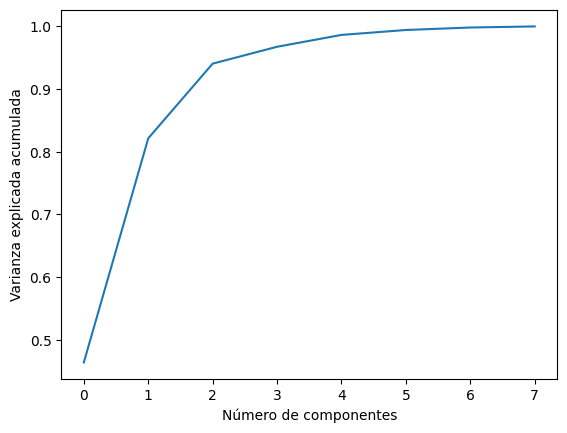

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

In [51]:
#También nos quedamos con 3 componentes
#Aplicamos nuestro PCA
pca=PCA(n_components=3)
X_c_s=pca.fit_transform(datos1_s)

In [52]:
#Mostraremos los coeficientes de cada componente respecto a las variables originales
pd.DataFrame(
data=pca.components_,
    columns=datos1.columns,
    index=['CP1','CP2','CP3']
)

,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
CP1,0.500113,-0.112909,-0.051768,0.498752,0.450292,0.492640,-0.072649,0.187002
CP2,0.085304,0.555049,0.574789,0.036556,0.121881,0.063577,0.573763,-0.069452
CP3,-0.027948,0.132804,0.076081,-0.005457,-0.303061,-0.010510,-0.020877,0.939879


In [54]:
pd.DataFrame(
  X_c_s,
  columns=['L','CE','D'],
  index=datos.Alumno)

,L,CE,D
Alumno,,,
A,-0.534826,-0.408414,-0.179744
B,1.744637,-1.693606,1.272700
C,-0.265113,1.528849,0.053166
D,2.361737,-1.667066,-0.283175
E,2.027540,3.653053,-0.842394
F,-2.270320,1.767937,0.517168
G,0.425667,-1.481992,0.694556
H,-3.213028,1.497132,-0.579363
I,-0.654795,-0.477378,-2.333235


``` python
array([0.44158748, 0.37988895, 0.1211854 ]) #varianza explicada sin escalar

In [56]:
pca.explained_variance_ratio_   #varianza explicada con escalamiento

array([0.46380349, 0.35759772, 0.11918516])

In [57]:
recon=pca.inverse_transform(X_c_s)
rec=pd.DataFrame(
    recon,
    columns=datos1.columns,
    index=datos.Alumno)
rec

,Lengua,Matemáticas,Física,Inglés,Filosofía,Historia,Química,Educación Física
Alumno,,,,,,,,
A,-0.297290,-0.190174,-0.220740,-0.280695,-0.236132,-0.287554,-0.191726,-0.240586
B,0.692475,-0.968000,-0.966955,0.801285,0.193471,0.738429,-1.125044,1.640057
C,-0.003655,0.885580,0.896535,-0.076627,0.050847,-0.033965,0.895348,-0.105788
D,1.046841,-1.229572,-1.102019,1.118526,0.946106,1.060476,-1.122167,0.291279
E,1.349163,1.686821,1.930683,1.149379,1.613519,1.239950,1.966275,-0.666306
F,-0.999057,1.306314,1.173068,-1.070521,-0.963562,-1.011487,1.168517,-0.061264
G,0.067050,-0.778400,-0.821027,0.154336,-0.199445,0.108181,-0.895737,0.835325
H,-1.462973,1.116821,0.982790,-1.544615,-1.088745,-1.481595,1.104517,-1.249350
I,-0.302985,-0.500899,-0.418009,-0.331299,0.354081,-0.328407,-0.177622,-2.282251


# Ejemplo 3: Comprar o no una casa

Ingresos: los ingresos de la familia mensual

gastos comunes: pagos de luz, agua, gas, etc mensual

pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.

gastos_otros: compra en supermercado y lo necesario para vivir al mes

ahorros: suma de ahorros dispuestos a usar para la compra de la casa.

vivienda: precio de la vivienda que quiere comprar esa familia

estado civil:

0-soltero
1-casados
2-divorciados

hijos: 
cantidad de hijos menores y que no trabajan.

trabajo:

0-sin empleo 1-autónomo
2-empleado
3-empresario
4-pareja: autónomos
5-pareja: empleados
6-pareja: autónomo y asalariado
7-pareja:empresario y autónomo
8-pareja: empresarios los dos o empresario y empleado

comprar: 0-No comprar 1-Compra Comprar o no una casa

Tarea: Realizar k-medias pero usando componentes principales.
¿Hubo una mejoría al usar PCA?